# **Nihal Gadkari**

In [1]:
import pandas as pd
import time
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataframe=pd.read_csv('/content/carprice.csv')
dataframe.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
dataframe.shape

(205, 26)

In [5]:
dataframe.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
dataframe.duplicated().sum()

0

In [7]:
dataframe.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
dataframe.drop("car_ID", axis=1, inplace=True)

In [9]:
correlation_matrix=dataframe.corr()
correlation_matrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


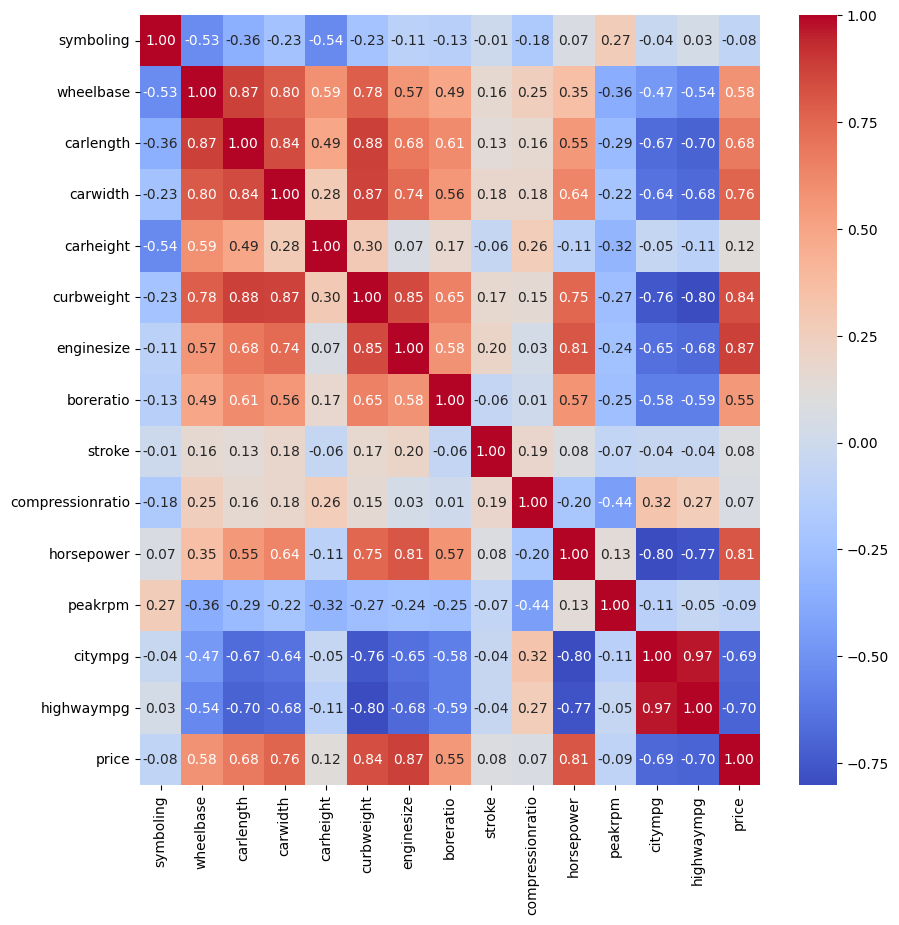

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [11]:
numerical_cols = []
categorical_cols = []

def get_numerical_and_categorical_columns(dataframe):
    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            numerical_cols.append(column)
        else:
            categorical_cols.append(column)

In [12]:
get_numerical_and_categorical_columns(dataframe)

In [13]:
numerical_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [14]:
categorical_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [15]:
print(f"No. of unique values in CarName: {dataframe['CarName'].nunique()}")
print(f"No. of unique values in fueltype: {dataframe['fueltype'].nunique()}")
print(f"No. of unique values in aspiration: {dataframe['aspiration'].nunique()}")
print(f"No. of unique values in doornumber: {dataframe['doornumber'].nunique()}")
print(f"No. of unique values in carbody: {dataframe['carbody'].nunique()}")
print(f"No. of unique values in driverwheel: {dataframe['drivewheel'].nunique()}")
print(f"No. of unique values in enginelocation: {dataframe['enginelocation'].nunique()}")
print(f"No. of unique values in enginetype: {dataframe['enginetype'].nunique()}")
print(f"No. of unique values in cylindernumber: {dataframe['cylindernumber'].nunique()}")
print(f"No. of unique values in fuelsystem: {dataframe['fuelsystem'].nunique()}")

No. of unique values in CarName: 147
No. of unique values in fueltype: 2
No. of unique values in aspiration: 2
No. of unique values in doornumber: 2
No. of unique values in carbody: 5
No. of unique values in driverwheel: 3
No. of unique values in enginelocation: 2
No. of unique values in enginetype: 7
No. of unique values in cylindernumber: 7
No. of unique values in fuelsystem: 8


In [16]:
dataframe["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [17]:
dataframe["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [18]:
dataframe['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [19]:
dataframe['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [20]:
dataframe['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [21]:
dataframe['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [22]:
dataframe['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [23]:
dataframe['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [24]:
dataframe['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [25]:
dataframe['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [26]:
le= LabelEncoder()
dataframe["CarName"]=le.fit_transform(dataframe["CarName"])
dataframe["fueltype"]=le.fit_transform(dataframe["fueltype"])
dataframe["aspiration"]=le.fit_transform(dataframe["aspiration"])
dataframe["doornumber"]=le.fit_transform(dataframe["doornumber"])
dataframe["carbody"]=le.fit_transform(dataframe["carbody"])
dataframe["drivewheel"]=le.fit_transform(dataframe["drivewheel"])
dataframe["enginelocation"]=le.fit_transform(dataframe["enginelocation"])
dataframe["enginetype"]=le.fit_transform(dataframe["enginetype"])
dataframe["cylindernumber"]=le.fit_transform(dataframe["cylindernumber"])
dataframe["fuelsystem"]=le.fit_transform(dataframe["fuelsystem"])

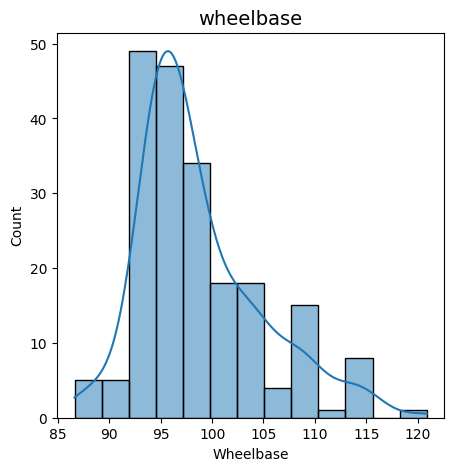

In [27]:
plt.figure(figsize=(5,5))
sns.histplot(dataframe["wheelbase"], kde=True)
plt.title("wheelbase", fontsize=14)
plt.xlabel("Wheelbase")
plt.ylabel("Count")
plt.show()

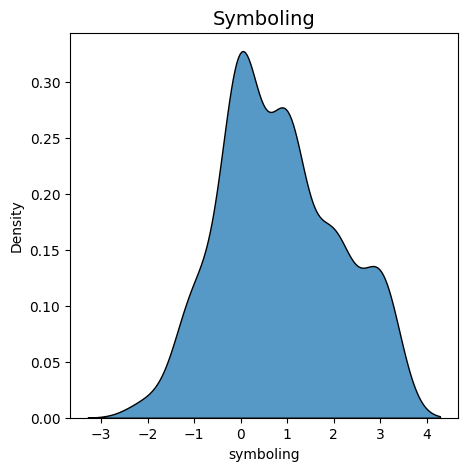

In [28]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="symboling", hue=None, multiple="stack")
plt.title("Symboling", fontsize=14)
plt.show()

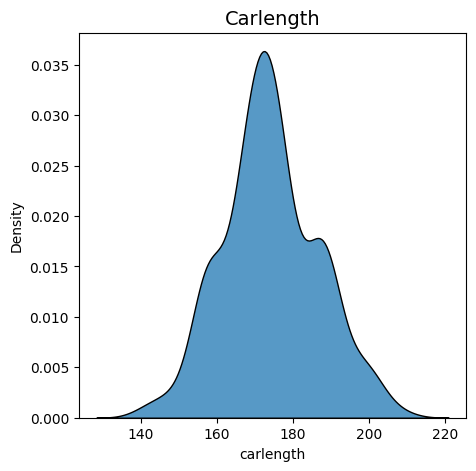

In [29]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="carlength", hue=None, multiple="stack")
plt.title("Carlength", fontsize=14)
plt.show()

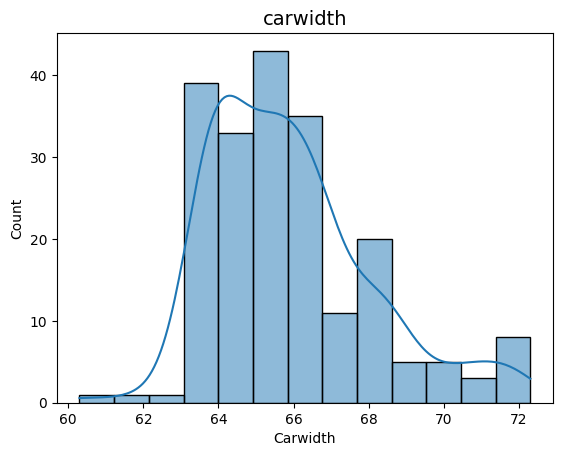

In [30]:
sns.histplot(dataframe["carwidth"], kde=True)
plt.title("carwidth", fontsize=14)
plt.xlabel("Carwidth")
plt.ylabel("Count")
plt.show()

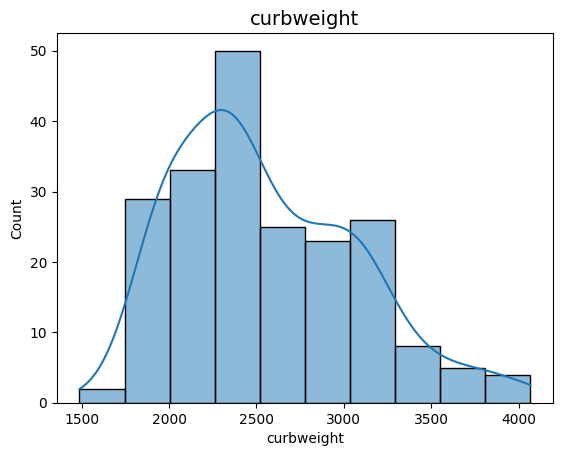

In [31]:
sns.histplot(dataframe["curbweight"], kde=True)
plt.title("curbweight", fontsize=14)
plt.xlabel("curbweight")
plt.ylabel("Count")
plt.show()

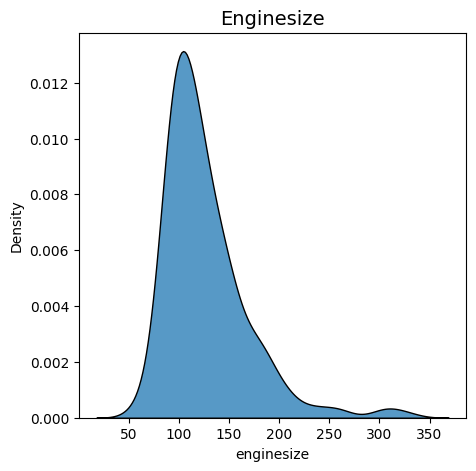

In [32]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="enginesize", hue=None, multiple="stack")
plt.title("Enginesize", fontsize=14)
plt.show()

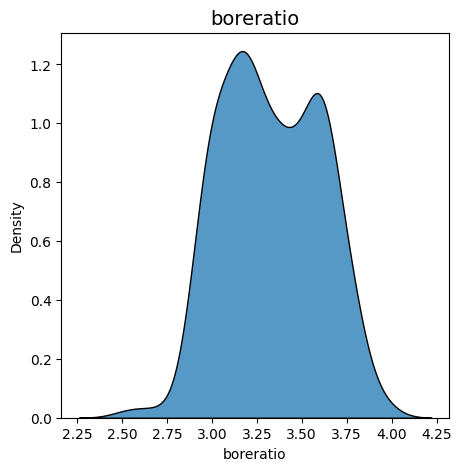

In [33]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="boreratio", hue=None, multiple="stack")
plt.title("boreratio", fontsize=14)
plt.show()

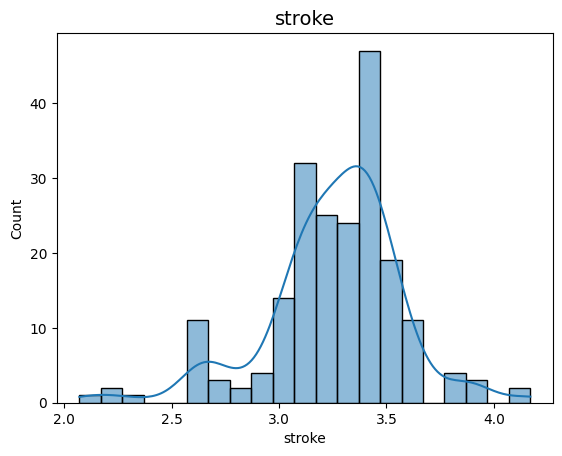

In [34]:
sns.histplot(dataframe["stroke"], kde=True)
plt.title("stroke", fontsize=14)
plt.xlabel("stroke")
plt.ylabel("Count")
plt.show()

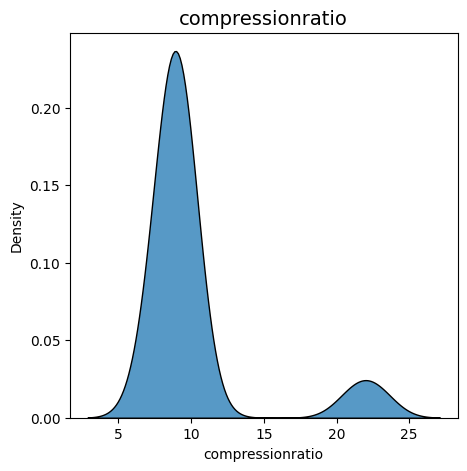

In [35]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="compressionratio", hue=None, multiple="stack")
plt.title("compressionratio", fontsize=14)
plt.show()

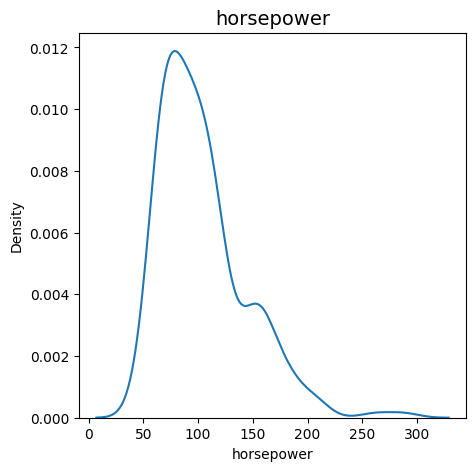

In [36]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="horsepower", hue=None)
plt.title("horsepower", fontsize=14)
plt.show()

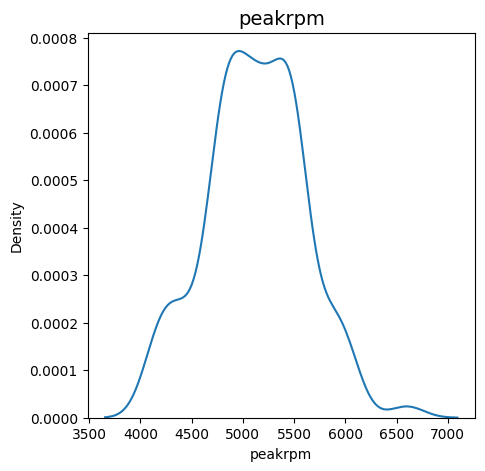

In [37]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="peakrpm", hue=None)
plt.title("peakrpm", fontsize=14)
plt.show()

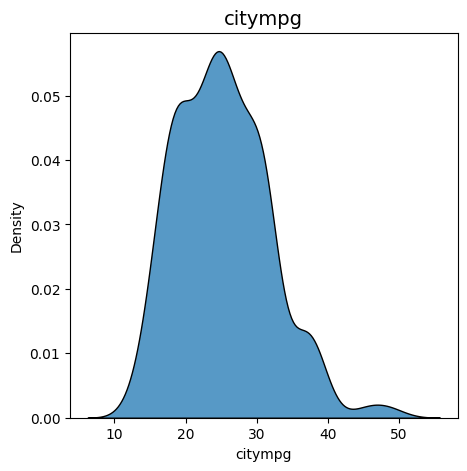

In [38]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="citympg", hue=None, multiple="stack")
plt.title("citympg", fontsize=14)
plt.show()

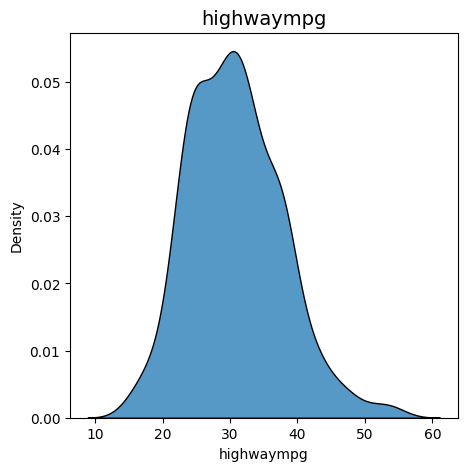

In [39]:
plt.figure(figsize=(5,5))
sns.kdeplot(data=dataframe, x="highwaympg", hue=None, multiple="stack")
plt.title("highwaympg", fontsize=14)
plt.show()

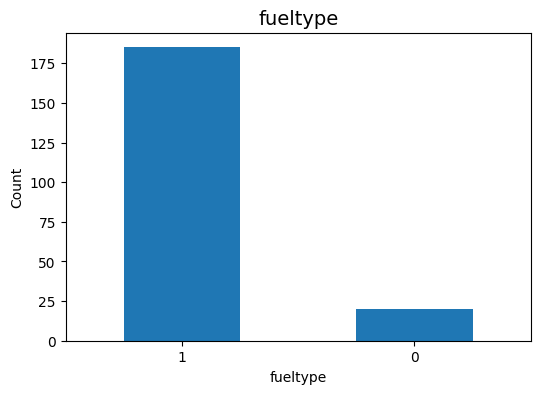

In [40]:
dataframe["fueltype"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("fueltype", fontsize=14)
plt.xlabel("fueltype")
plt.ylabel("Count")
plt.show()

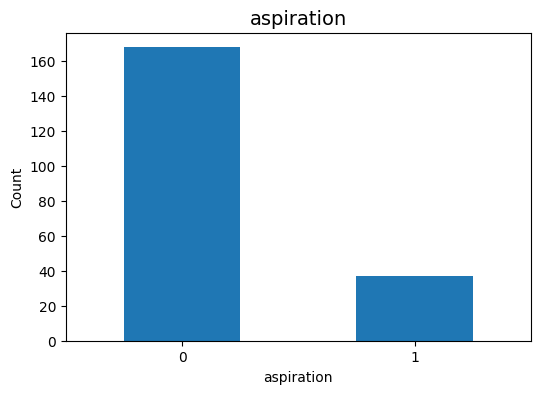

In [41]:
dataframe["aspiration"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("aspiration", fontsize=14)
plt.xlabel("aspiration")
plt.ylabel("Count")
plt.show()

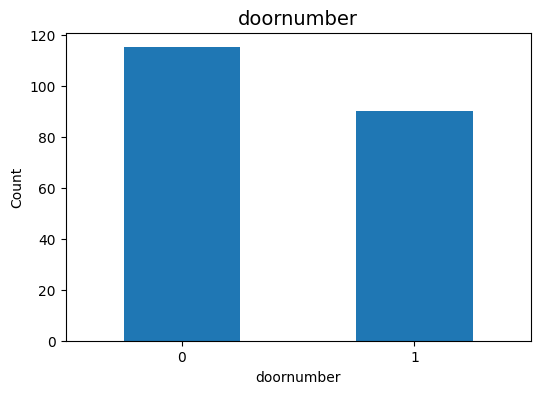

In [42]:
dataframe["doornumber"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("doornumber", fontsize=14)
plt.xlabel("doornumber")
plt.ylabel("Count")
plt.show()

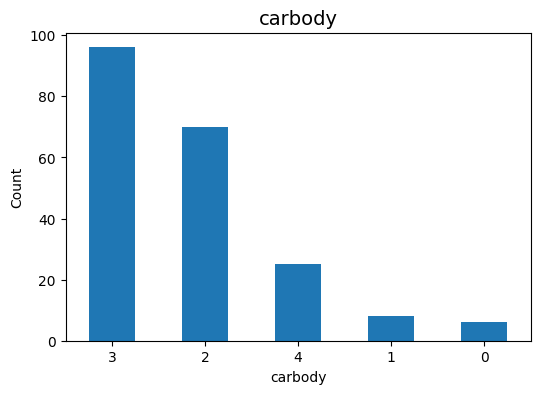

In [43]:
dataframe["carbody"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("carbody", fontsize=14)
plt.xlabel("carbody")
plt.ylabel("Count")
plt.show()

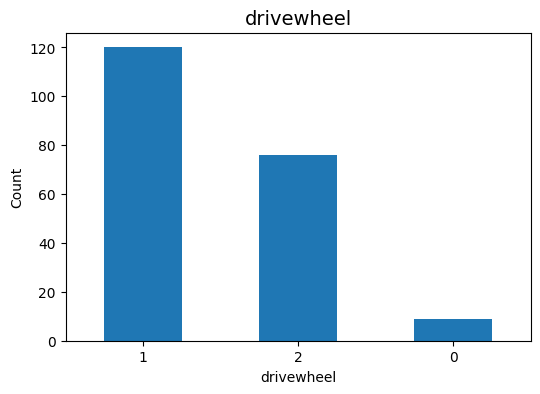

In [44]:
dataframe["drivewheel"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("drivewheel", fontsize=14)
plt.xlabel("drivewheel")
plt.ylabel("Count")
plt.show()

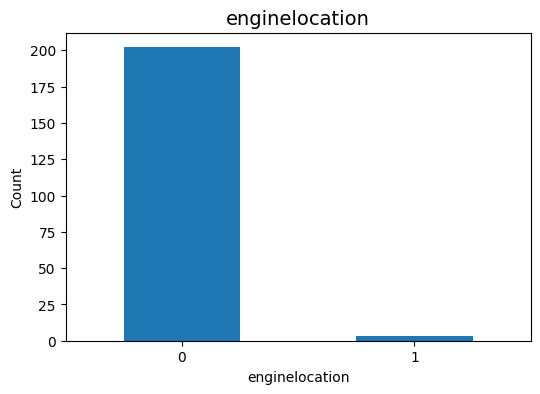

In [45]:
dataframe["enginelocation"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("enginelocation", fontsize=14)
plt.xlabel("enginelocation")
plt.ylabel("Count")
plt.show()

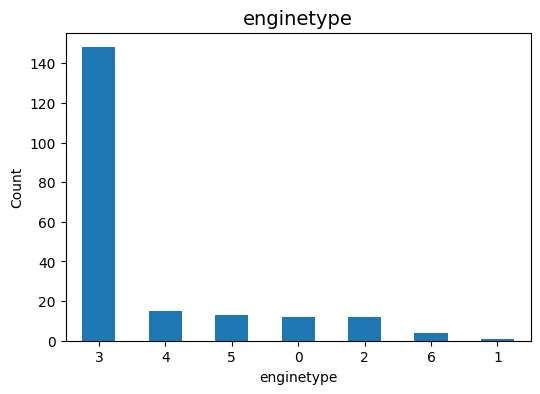

In [46]:
dataframe["enginetype"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("enginetype", fontsize=14)
plt.xlabel("enginetype")
plt.ylabel("Count")
plt.show()

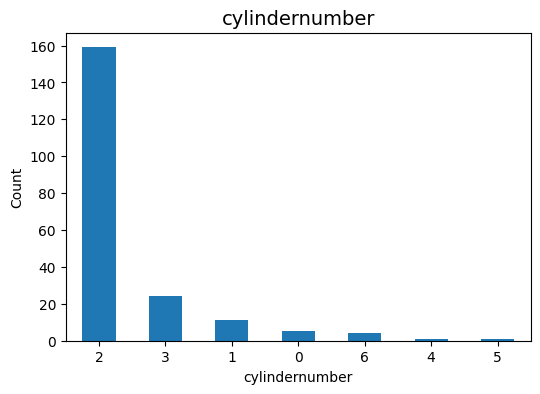

In [47]:
dataframe["cylindernumber"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("cylindernumber", fontsize=14)
plt.xlabel("cylindernumber")
plt.ylabel("Count")
plt.show()

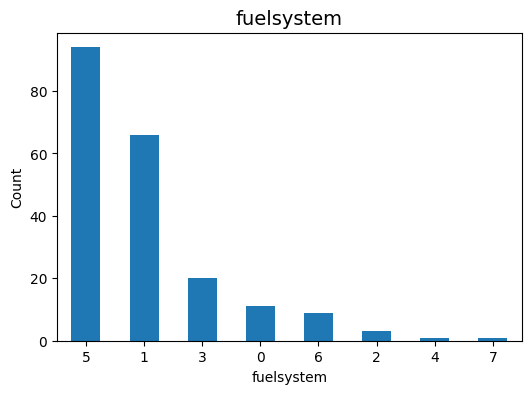

In [48]:
dataframe["fuelsystem"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("fuelsystem", fontsize=14)
plt.xlabel("fuelsystem")
plt.ylabel("Count")
plt.show()

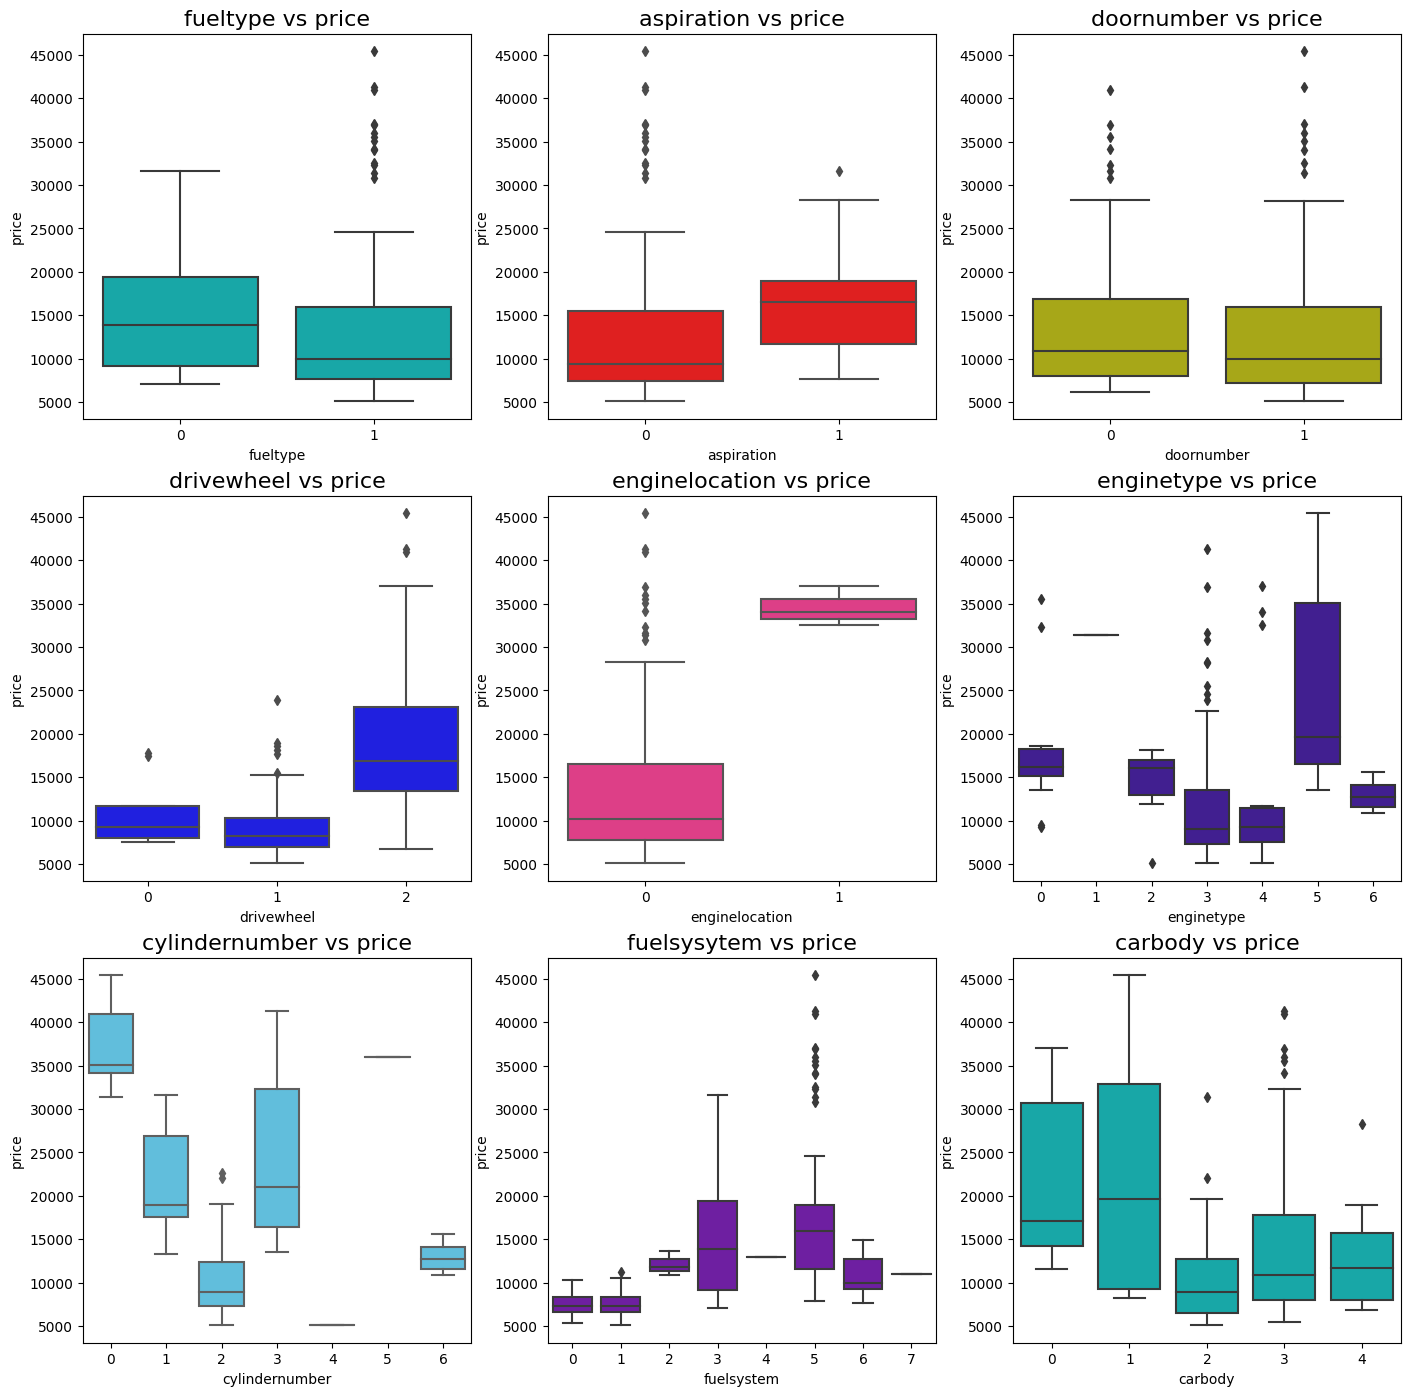

In [49]:
fig=plt.figure(figsize=(17,17))

ax=fig.add_subplot(331)
sns.boxplot(data=dataframe, x=dataframe["fueltype"], y=dataframe["price"], hue=None ,color='c',ax=ax)
ax.set_title('fueltype vs price', fontsize=16)

ax=fig.add_subplot(332)
sns.boxplot(data=dataframe, x=dataframe["aspiration"], y=dataframe["price"], hue=None ,color='r',ax=ax)
ax.set_title('aspiration vs price', fontsize=16)

ax=fig.add_subplot(333)
sns.boxplot(data=dataframe, x=dataframe["doornumber"], y=dataframe["price"], hue=None ,color='y',ax=ax)
ax.set_title('doornumber vs price', fontsize=16)

ax=fig.add_subplot(334)
sns.boxplot(data=dataframe, x=dataframe["drivewheel"], y=dataframe["price"], hue=None ,color='b',ax=ax)
ax.set_title('drivewheel vs price', fontsize=16)

ax=fig.add_subplot(335)
sns.boxplot(data=dataframe, x=dataframe["enginelocation"], y=dataframe["price"], hue=None ,color='#F72585',ax=ax)
ax.set_title('enginelocation vs price', fontsize=16)

ax=fig.add_subplot(336)
sns.boxplot(data=dataframe, x=dataframe["enginetype"], y=dataframe["price"], hue=None ,color='#3A0CA3',ax=ax)
ax.set_title('enginetype vs price', fontsize=16)

ax=fig.add_subplot(337)
sns.boxplot(data=dataframe, x=dataframe["cylindernumber"], y=dataframe["price"], hue=None ,color='#4CC9F0',ax=ax)
ax.set_title('cylindernumber vs price', fontsize=16)

ax=fig.add_subplot(338)
sns.boxplot(data=dataframe, x=dataframe["fuelsystem"], y=dataframe["price"], hue=None ,color='#7209B7',ax=ax)
ax.set_title('fuelsysytem vs price', fontsize=16)

ax=fig.add_subplot(339)
sns.boxplot(data=dataframe, x=dataframe["carbody"], y=dataframe["price"], hue=None ,color='c',ax=ax)
ax.set_title('carbody vs price', fontsize=16)

plt.show()

In [50]:
dataframe=pd.read_csv('/content/carprice.csv')
dataframe.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
dataframe.drop("car_ID", axis=1, inplace=True)

In [52]:
dataframe.shape

(205, 25)

In [53]:
df=dataframe.drop(categorical_cols, axis=1)
columns=df.columns.to_list()
columns, df.shape

(['symboling',
  'wheelbase',
  'carlength',
  'carwidth',
  'carheight',
  'curbweight',
  'enginesize',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'citympg',
  'highwaympg',
  'price'],
 (205, 15))

In [54]:
def Winsorization(columns, dataframe, a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(dataframe[col], a)
        q2= np.percentile(dataframe[col],b)

        for pos in range(len(dataframe)):
            if dataframe[col].iloc[pos]>q2 or dataframe[col].iloc[pos]<q1:
                outliers.append(pos)

    return outliers

In [55]:
outliers= Winsorization(columns,df, a=1, b=99)
outliers=set(outliers)
outliers=list(outliers)

In [56]:
def Z_Score(columns, dataframe):
    outliers1=[]
    for col in columns:
        mean=np.mean(dataframe[col])
        std=np.std(dataframe[col])

        for pos in range(len(dataframe)):
            item=dataframe[col].iloc[pos]
            z_score=(item-mean)/std

            if np.abs(z_score)>3:
                outliers1.append(pos)

        return outliers1

In [57]:
outliers1= Z_Score(columns, df)
outliers1=set(outliers1)
outliers1=list(outliers1)

In [58]:
def IQR(columns, dataframe):
    outliers2=[]
    for col in columns:
        q1 = dataframe[col].quantile(0.25)
        q3 = dataframe[col].quantile(0.75)
        iqr = q3 - q1
        lower_tail= q1 - (2.5 * iqr)
        upper_tail= q3 + (2.5 * iqr)
        for pos in range(len(dataframe)):
            if dataframe[col].iloc[pos] > upper_tail or dataframe[col].iloc[pos] < lower_tail:
                outliers2.append(pos)


    return outliers2

In [59]:
outliers2= IQR(columns,df)
outliers2=set(outliers2)
outliers2=list(outliers2)

In [60]:
def ratio(dataframe, outliers):
    ratio= len(outliers)/len(dataframe)
    return ratio

In [61]:
print(f"Outliers Detected by Winsorzation Method: {ratio(df, outliers)}")
print(f"Outliers Detected by Z_Score Method: {ratio(df, outliers1)}")
print(f"outliers Detected by IQR Method:{ratio(df, outliers2)}")

Outliers Detected by Winsorzation Method: 0.16097560975609757
Outliers Detected by Z_Score Method: 0.0
outliers Detected by IQR Method:0.14634146341463414


In [62]:
dataframe.drop(dataframe.index[outliers], inplace=True)

In [63]:
dataframe.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250.0
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710.0
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920.0


In [64]:
x_train, x_test, y_train, y_test=train_test_split(dataframe.drop("price", axis=1),
                                                  dataframe["price"],
                                                  test_size=0.3,
                                                  random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 24), (120,), (52, 24), (52,))

In [65]:
ohe= OneHotEncoder(handle_unknown="ignore")

x_train_ohe= ohe.fit_transform(x_train[categorical_cols])
x_train_ohe= x_train_ohe.toarray()

x_train_ohe_df= pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names_out([categorical_cols[i]  for i in range(len(categorical_cols))]))

x_train_ohe_df.index= x_train.index

x_train = pd.concat([x_train, x_train_ohe_df], axis=1)

x_train.drop(categorical_cols, axis=1, inplace=True)

x_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
46,2,96.0,172.6,65.2,51.4,2734,119,3.43,3.23,9.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
151,1,95.7,158.7,63.6,54.5,2040,92,3.05,3.03,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1,93.7,157.3,63.8,50.6,2191,98,3.03,3.39,7.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
169,2,98.4,176.2,65.6,52.0,2551,146,3.62,3.50,9.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
116,0,107.9,186.7,68.4,56.7,3252,152,3.70,3.52,21.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
x_test_ohe= ohe.transform(x_test[categorical_cols])
x_test_ohe= x_test_ohe.toarray()

x_test_ohe_df= pd.DataFrame(x_test_ohe, columns=ohe.get_feature_names_out([categorical_cols[i] for i in range(len(categorical_cols))]))

x_test_ohe_df.index= x_test.index

x_test= pd.concat([x_test, x_test_ohe_df], axis=1)

x_test.drop(categorical_cols, axis=1, inplace=True)

x_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
95,1,94.5,165.6,63.8,53.3,2028,97,3.15,3.29,9.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
164,1,94.5,168.7,64.0,52.6,2204,98,3.19,3.03,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
180,-1,104.5,187.8,66.5,54.1,3131,171,3.27,3.35,9.2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78,2,93.7,157.3,64.4,50.8,2004,92,2.97,3.23,9.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
186,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.40,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
model= LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print (f"model : {model} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}")

model : LinearRegression() and  rmse score is : 4172120.7330902, r2 score is -357300.65110233496


In [69]:
root_mean_squared_error=[]
r2=[]
model_names=[]

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
et= ExtraTreesRegressor(random_state=42)

models = [rf,gb,et]

for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    root_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2.append(r2_score(y_test, y_pred))


model_names = ['RandomForest','GradientBoost','ExtraTree']
result_df = pd.DataFrame({'RMSE':root_mean_squared_error,'R2_score': r2},index=model_names)
result_df

,RMSE,R2_score
RandomForest,1654.554969,0.943807
GradientBoost,1803.566521,0.933229
ExtraTree,1894.359352,0.926338


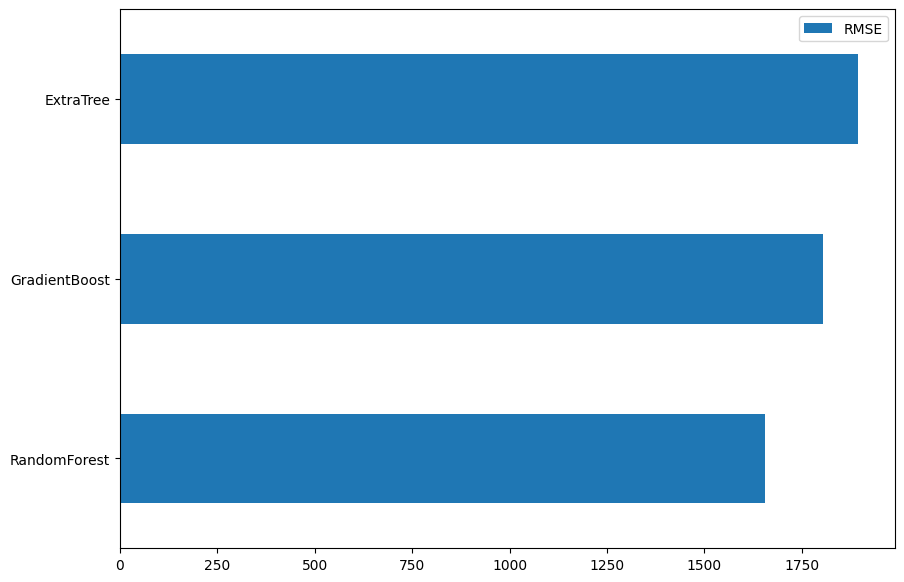

In [70]:
result_df["RMSE"].plot(kind="barh", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

In [71]:
x_train.shape

(120, 139)

In [72]:
importances = rf.feature_importances_
feature_names = [f"feature {i}" for i in range(x_train.shape[1])]

for i in range(len(rf.feature_importances_)):
    if rf.feature_importances_[i] >0.01:
        print(f"{x_train.columns[i]} : {round(rf.feature_importances_[i],3)}")

wheelbase : 0.069
carlength : 0.014
carwidth : 0.017
curbweight : 0.429
enginesize : 0.2
boreratio : 0.01
horsepower : 0.043
peakrpm : 0.011
highwaympg : 0.093
cylindernumber_four : 0.037
